In [81]:
import numpy as np
import numpy.random as rand
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from utils import generate_convex_polygon, center_polygon

[[0.76269486 0.36983616]
 [0.35944073 0.86675815]
 [0.24836582 0.89073135]
 [0.23730514 0.71558236]
 [0.53057926 0.16337915]
 [0.65869053 0.10926865]]
[[0.94325368 0.56990329]
 [0.50708251 0.82344211]
 [0.30520233 0.76934266]
 [0.15656759 0.56906919]
 [0.33564144 0.17522388]
 [0.54932879 0.20857469]]


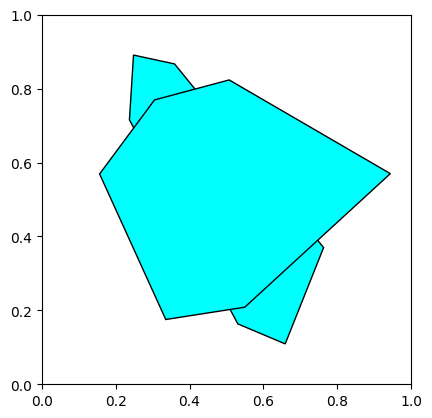

In [ ]:
points = generate_convex_polygon(n=6)

pca = PCA(n_components=2)
points_centered = points - np.mean(points, axis=0)
pca.fit(points_centered)

transformed_points = pca.transform(points_centered)
variance = np.var(transformed_points, axis=0)  # Variance along each principal component
scaling_factors = 0.25 / np.sqrt(variance)  # Scale to unit variance
transformed_points_scaled = transformed_points * scaling_factors

rescaled_points = pca.inverse_transform(transformed_points_scaled) + np.mean(points, axis=0)

print(points)
print(rescaled_points)

new_points = center_polygon(rescaled_points)

fig, ax = plt.subplots()
polygon1 = patches.Polygon(points, closed=True, edgecolor='black', facecolor='cyan')
polygon2 = patches.Polygon(new_points, closed=True, edgecolor='black', facecolor='cyan')
ax.add_patch(polygon1)
ax.add_patch(polygon2)
ax.set_aspect('equal', 'box')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.show()

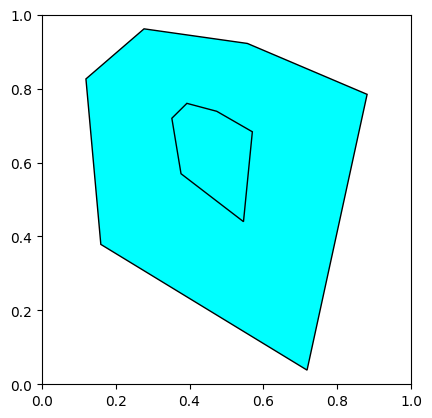